In [1]:
!pip install NetworkX
import networkx as nx
import numpy as np
import pandas as pd

In [2]:
#using a dataset from my Reddit Datamine since it had a lot of interesting data to use 
# link to the notebook where this data was pulled from
# https://github.com/pranavbhadharla/social_media_analytics/blob/main/hw2/Reddit_Search%20NFL%20Bets%20(1).ipynb
df_comments = pd.read_csv('REDDIT_COMMENTS_2022-09-10T16-48-26-0400.csv')

In [9]:
# df of all comments from the most popular sportsbook
df = df_comments[df_comments["subreddit"]=='sportsbook']

# The main goal that we have is to see what subbreddits are connected through users. Some other matrixes are being created for potential future calculations 


In [53]:
# matrix of posts to authors
df_posts_to_author = pd.crosstab(df.post_id, df.comment_author)
# matrix of subbredit to posts 
df_posts_to_subreddit = pd.crosstab(df.subreddit,df.post_id)
# getting shape to make sure matrix multiplication is being done right
df_posts_to_subreddit.shape

(38, 819)

In [13]:
# multiplying previous matrixes to get posts to subreddit matrix. 
# While this could have been done straight between the two, I wanted the other relations in case I wanted
# to explore other realtionships
df_subreddit_to_author=np.matmul(df_posts_to_subreddit,df_posts_to_author)

/var/folders/q1/k8xy5vbn4mvb32fd180tdqk80000gn/T/ipykernel_46217/3723218645.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  df_subreddit_to_author=np.matmul(df_posts_to_subreddit,df_posts_to_author)


In [14]:
# multiplying the matrix by its transpose to get the subbreddit to subreddit relationship
df_subreddit_to_author_squared=np.matmul(df_subreddit_to_author,np.transpose(df_subreddit_to_author))

/var/folders/q1/k8xy5vbn4mvb32fd180tdqk80000gn/T/ipykernel_46217/2039454993.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  df_subreddit_to_author_squared=np.matmul(df_subreddit_to_author,np.transpose(df_subreddit_to_author))


In [17]:
df_subreddit_to_author_squared.index

Index(['AmItheAsshole', 'AroundTheNFL', 'BettingPicks', 'DKNG',
       'DraftKingsDiscussion', 'DynastyFF', 'G101SafeHaven',
       'GamblingAddiction', 'GetSporttrade', 'GreenBayPackers', 'LasVegas',
       'NFLBETS', 'PatMcAfeeShowOfficial', 'PickleFinancial', 'SRTBets',
       'Saints', 'StockMarketChat', 'TimDillon', 'billsimmons', 'cordcutters',
       'dfsports', 'eagles', 'falcons', 'fanduel', 'fantasyfootball',
       'findaleague', 'gambling', 'kansascity', 'nfl', 'oslo', 'shavingpoints',
       'sofi', 'sportsbetting', 'sportsbettingag', 'sportsbook',
       'sportsgambling', 'steelers', 'vegas'],
      dtype='object', name='subreddit')

In [54]:
# ensuring labels are correct
df_final = pd.DataFrame(df_subreddit_to_author_squared.values,index=df_subreddit_to_author_squared.index \
                        ,columns=df_subreddit_to_author_squared.index)

In [48]:
# getting only the top subreddits since there are so many
columns=df_final.sum(axis = 1, skipna = True)>10000
columns=columns.index[columns==True]


In [49]:
df_final=pd.DataFrame(df_final,index=columns,columns=columns)
df_final

subreddit,AmItheAsshole,PatMcAfeeShowOfficial,PickleFinancial,SRTBets,billsimmons,cordcutters,eagles,falcons,fantasyfootball,kansascity,nfl,sportsbetting,sportsbook
subreddit,,,,,,,,,,,,,
AmItheAsshole,15625,0,0,0,0,0,575,0,0,0,0,0,0
PatMcAfeeShowOfficial,0,1331,0,0,0,187,0,242,165,77,2090,0,681593
PickleFinancial,0,0,10648,0,0,0,0,0,0,0,0,0,0
SRTBets,0,0,0,16,0,0,0,0,0,0,0,0,12376
billsimmons,0,0,0,0,11616,0,0,0,0,0,0,0,506
cordcutters,0,187,0,0,0,5038,0,374,255,119,3230,0,1053371
eagles,575,0,0,0,0,0,13225,0,0,0,0,0,0
falcons,0,242,0,0,0,374,0,11624,330,154,4180,0,1363186
fantasyfootball,0,165,0,0,0,255,0,330,82882,105,2850,0,976358


In [50]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [51]:
G = nx.from_pandas_adjacency(df_final)

{'AmItheAsshole': Text(1.0, -2.292486274449103e-09, 'AmItheAsshole'),
 'PatMcAfeeShowOfficial': Text(0.8854560287515193, 0.4647231547266753, 'PatMcAfeeShowOfficial'),
 'PickleFinancial': Text(0.5680647611233429, 0.8229838360369068, 'PickleFinancial'),
 'SRTBets': Text(0.12053670918382015, 0.992708832226107, 'SRTBets'),
 'billsimmons': Text(-0.3546048030136695, 0.9350162464375796, 'billsimmons'),
 'cordcutters': Text(-0.7485107298490434, 0.6631226334263005, 'cordcutters'),
 'eagles': Text(-0.9709417873820401, 0.23931566483289468, 'eagles'),
 'falcons': Text(-0.9709417873820401, -0.2393156098132241, 'falcons'),
 'fantasyfootball': Text(-0.7485107894536865, -0.6631225784066298, 'fantasyfootball'),
 'kansascity': Text(-0.35460498182759886, -0.9350161914179089, 'kansascity'),
 'nfl': Text(0.12053676878846328, -0.9927088368110795, 'nfl'),
 'sportsbetting': Text(0.5680645823094135, -0.8229839598311656, 'sportsbetting'),
 'sportsbook': Text(0.8854560287515193, -0.46472318911396937, 'sportsbook

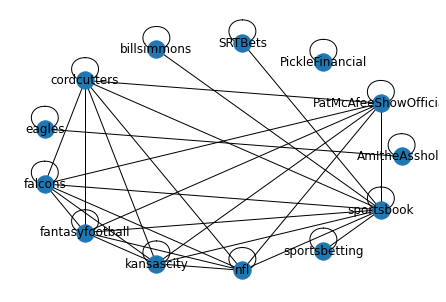

In [52]:
# graphing graph with circular layout to see all relationships
pos = nx.circular_layout(G)
nx.draw(G, pos=pos)
nx.draw_networkx_labels(G,pos)